In [13]:
import pandas as pd
df = pd.read_csv("EVSales.csv")
print(df.shape)
print(df.columns)

(96845, 8)
Index(['Year', 'Month_Name', 'Date', 'State', 'Vehicle_Class',
       'Vehicle_Category', 'Vehicle_Type', 'EV_Sales_Quantity'],
      dtype='object')


In [14]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Year'].astype(int)
df.isnull().sum()  

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

Text(0.5, 1.0, 'Year-wise EV Sales in India')

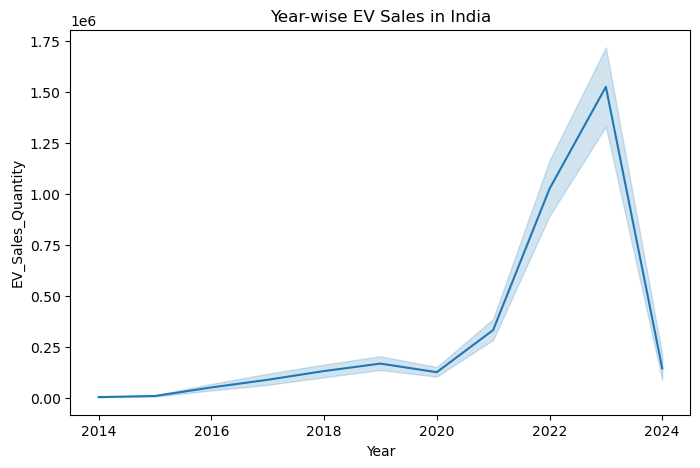

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.lineplot(x='Year', y='EV_Sales_Quantity', data=df, estimator='sum')
plt.title('Year-wise EV Sales in India')

(array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.]),
 [Text(0.0, 0, '0'),
  Text(200000.0, 0, '200000'),
  Text(400000.0, 0, '400000'),
  Text(600000.0, 0, '600000'),
  Text(800000.0, 0, '800000'),
  Text(1000000.0, 0, '1000000')])

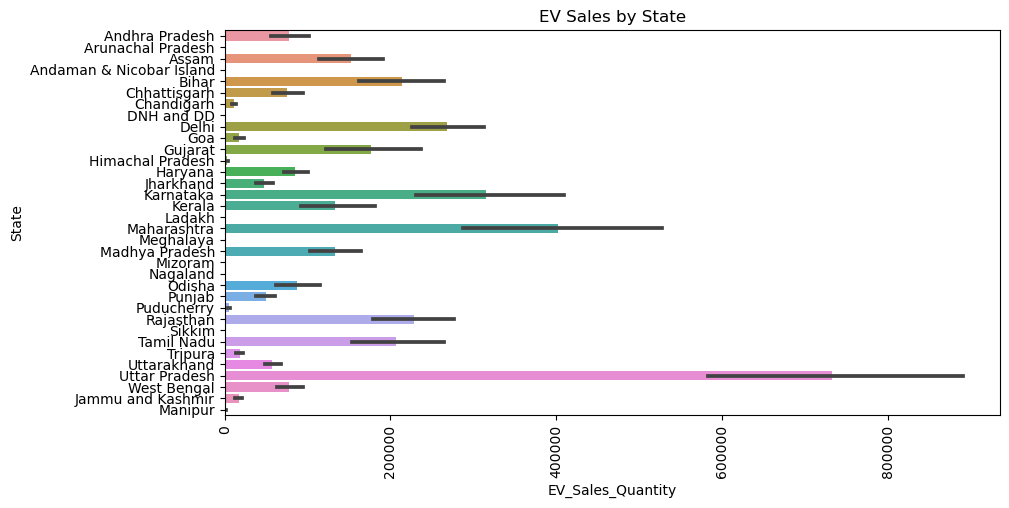

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(y='State', x='EV_Sales_Quantity', data=df, estimator='sum')
plt.title('EV Sales by State')
plt.xticks(rotation=90)

<Axes: xlabel='Vehicle_Category', ylabel='EV_Sales_Quantity'>

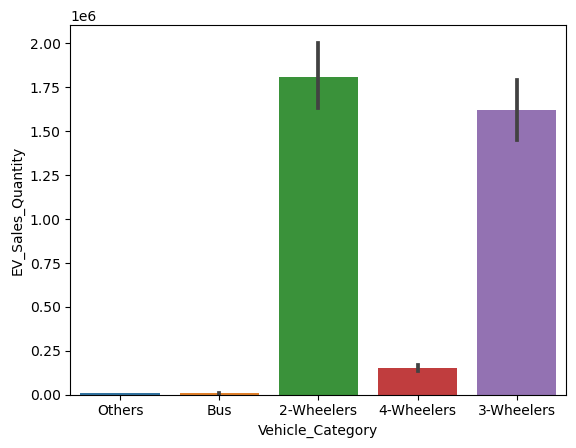

In [6]:
sns.barplot(x='Vehicle_Category', y='EV_Sales_Quantity', data=df, estimator='sum')


In [7]:
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df_encoded = pd.get_dummies(df, columns=['State', 'Vehicle_Class', 'Vehicle_Category', 'Vehicle_Type'], drop_first=True)
df_encoded.drop(['Date', 'Month_Name'], axis=1, inplace=True)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

X = df_encoded.drop('EV_Sales_Quantity', axis=1)
y = df_encoded['EV_Sales_Quantity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 130.58175227721011


Text(0.5, 1.0, 'Actual vs Predicted EV Sales')

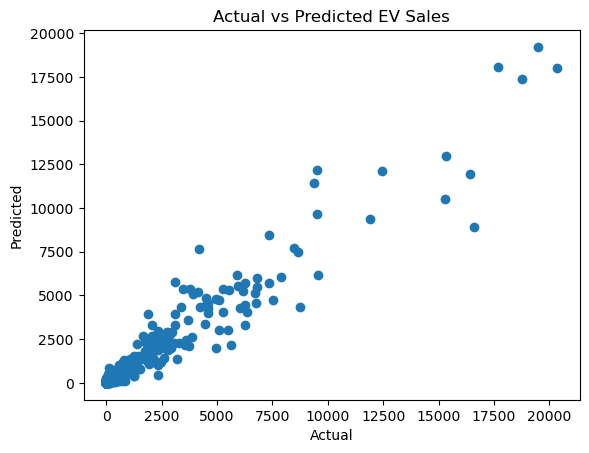

In [9]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted EV Sales')

Text(0.5, 1.0, '')

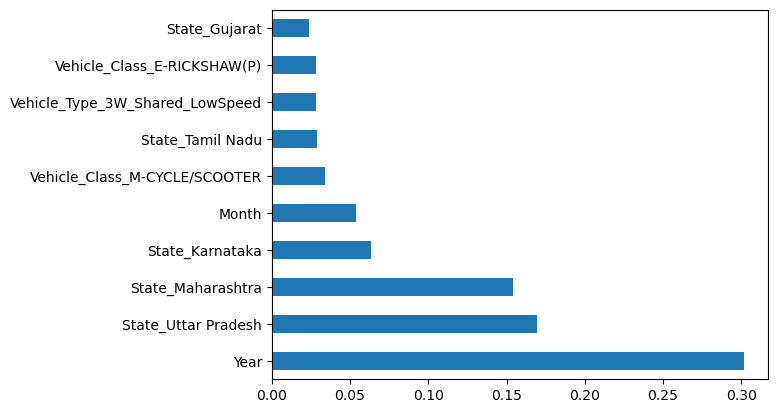

In [12]:
importance = pd.Series(model.feature_importances_, index=X.columns)
importance.nlargest(10).plot(kind='barh')
plt.title("")